# 코로나 19 예측 및 원인 분석

2020년 1월1일부터 12월20일 사이에 코로나와 관련 있는 데이터

모든 데이터를 쓸 필요는 없고, 이외의 데이터를 활용하는 것도 가능


- 코로나 발생 현황: 1월1일 부터 12월 20일까지 한국 전체 데이터, 이중 서울 지여그이 코로나 발생 예측 모델을 개발
    1월 1일부터 11월15일까지 데이터를 학습데이터로 쓰고, 11월 16일부터 11월 30일까지를 검증데이터로 사용 

- 구글 이동성 데이터: 구글에서 제공하는 이동 경향을 나타내는 데이터
    '구글 모빌리티 리포트로 알아본 k-방역' 참조

- 서울시 코로나 대응 일지: 서울시의 코로나 관련 방역 대책에 대한 요약 정보 제공

- 서울시 코로나 확진자 현황: 확진자 개개인별 정보 제공

- 지하철 이용객 현황: 서울시 역사별 지하철 이용객 현황 데이터

- 티맵 검색 기록; 티맴에서 어떤 지역이 주로 검색되었는지 보여주는 데이터
    SKT웹 사이트에서 직접 다운로드

- SKT유동인구 데이터: 지역별 유동인구 데이터, SKT웹 사이트에서 다운로드

- SKT음성통화 데이터: 음성 통화 위치 데이터, SKT웹사이트에서 다운로드

- 뉴스데이터: 한국언어진흥재단 코로나를 제목으로 갖는 뉴스 데이터
    키워드: 기사제목기준 - 코로나19, 코로나, 코로나 바이러스, 신종 코로나바이러스, COVID-19,코비드19
    언론사: 중앙지(경향신문, 국민일보, 내일신문, 동아일보, 문화일보,서울신문, 세계일보, 조선일보, 중앙일보, 한겨레, 한국일보)
    경제지(매일경제, 머니투데이, 서울경제, 아시아경제, 아주경제, 파이넨셜뉴스, 한국경제, 헤럴드경제)
    전문지(디지털타임스, 전자신문)

- 기상데이터: 기상청 일자별 서울 기상 데이터
- 네이버검색데이터: 네이버에서 검색 키워드 사용 트랜드 데이터

# 분석 과제

코로나19 발생 예측을 모델링하는 과제
11월16일부터 11월 30일까지 발생 빈도를 정확히 예측

예측의 정확성만 아니라 코로나19 발생에 영향을 미치는 요인을 설명하는 것도 중요함

단, 예측 모델링 이외의 분석 팀의 결정으로 행사 주관 교수와 사전에 협의 다른 과제(예, 시각화, 텍스트 분석 등)를 수행할 수 있습니다.

제출기한: 2020년 12월 28일 오후 10:00

파워포인트를 활용하여 작성한 후 제출 

# 심사기준
- 데이터 탐색 결과(시각화포함) 20점
- 데이터 전처리 20점
- 데이터 분석 기법과 결과 40점
- 보고서의 품질 20점

In [566]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 특정 시각화 모듈 불러오기 
plt.style.use('seaborn')

# plt.show() 구문 없이 주피터 상에 시각화 나타내기
%matplotlib inline

In [567]:
# window 시각화 중 한국어 지원하는 코드 

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if  platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [568]:
# 서울시 코로나 확진자 현황 

df = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/서울시 코로나19 확진자 현황.csv', encoding='CP949')

In [439]:
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,15039,12.20.,NaN,NaN,NaN,노원구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-21 10:51:32,2020-12-21 10:51:32,Y
1,15038,12.20.,NaN,NaN,NaN,중구,NaN,구로구 소재 요양병원 관련,NaN,NaN,NaN,2020-12-21 10:51:32,2020-12-21 10:51:32,Y
2,15037,12.20.,NaN,NaN,NaN,종로구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-21 10:51:32,2020-12-21 10:51:32,Y
3,15036,12.20.,NaN,NaN,NaN,금천구,NaN,구로구 소재 요양병원 관련,NaN,NaN,NaN,2020-12-21 10:51:32,2020-12-21 10:51:32,Y
4,15035,12.20.,NaN,NaN,NaN,강동구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-21 10:51:32,2020-12-21 10:51:32,Y


In [569]:
# 필요한 부분만 사용
df = df[['확진일','지역']]

In [570]:
df.head()

,확진일,지역
0,12.20.,노원구
1,12.20.,중구
2,12.20.,종로구
3,12.20.,금천구
4,12.20.,강동구


In [571]:
# 확진일을 월과 일 컬럼으로 나누기

month = []
day = []

for i in range(len(df)):
  a = df['확진일'][i].split('.')[0]  #월
  b = df['확진일'][i].split('.')[1]  #일

  # 한자리 월을 01, 02, ... , 09 형태로 만들기 
  if len(a) == 1:
    month.append('0' + a)
  else:
    month.append(a)

  # 한자리 일을 01, 02, ..., 09 형태로 만들기 
  if len(b) == 1:
    day.append('0' + b)
  else:
    day.append(b) 

# 월, 일 컬럼 만들어주기 
df['월'] = month
df['일'] = day

# 확진일 컬럼 삭제
del df['확진일']

In [444]:
df.head()

,지역,월,일
0,노원구,12,20
1,중구,12,20
2,종로구,12,20
3,금천구,12,20
4,강동구,12,20


In [572]:
df['월'].value_counts()

12    6073
11    2909
08    2417
09    1304
10     733
06     460
03     391
07     281
05     228
04     156
02      80
01       7
Name: 월, dtype: int64

In [573]:
# 3월 ~ 11월을 분석기간으로 사용하기 위해 나머지 삭제

df.drop(df.loc[df['월'] == '01'].index, inplace = True)
df.drop(df.loc[df['월'] == '02'].index, inplace = True)
df.drop(df.loc[df['월'] == '12'].index, inplace = True)

In [574]:
df['월'].value_counts()

11    2909
08    2417
09    1304
10     733
06     460
03     391
07     281
05     228
04     156
Name: 월, dtype: int64

In [575]:
# 구정리하기 
df['지역'].unique()
# 타시도와 기타 존재 

array(['강북구', '타시도', '영등포구', '노원구', '강동구', '광진구', '중랑구', '서초구', '강서구',
       '관악구', '은평구', '양천구', '구로구', '강남구', '중구', '기타', '마포구', '송파구', '용산구',
       '성북구', '도봉구', '서대문구', '금천구', '성동구', '동대문구', '동작구', '종로구'],
      dtype=object)

In [576]:
print(len(df[df['지역'] == '기타'])) # 기타 230개
print(len(df[df['지역'] == '타시도']))  # 타시도 426개 존재 

230
426


In [577]:
# 서울지역만 분석하기 위해 기타지역과 타시도 제거 
df.drop(df.loc[df['지역'] == '기타'].index, inplace = True)
df.drop(df.loc[df['지역'] == '타시도'].index, inplace = True)

In [578]:
len(df)

8223

In [579]:
df.head()

,지역,월,일
6073,강북구,11,30
6076,영등포구,11,30
6077,영등포구,11,30
6078,노원구,11,30
6079,강동구,11,30


In [580]:
# 데이터 통합을 위해 데이터 프레임 생성
month = ['03','04','05','06','07','08','09','10','11']
day = ['01','02','03','04','05','06','07','08','09',
       '10','11','12','13','14','15','16','17','18','19','20',
       '21','22','23','24','25','26','27','28','29','30','31']

# 서울시 25개구 
gu = ['중구', '구로구', '서대문구', '성동구', '송파구', '용산구', '성북구', '영등포구', '동작구',
       '중랑구', '노원구', '양천구', '강남구', '강서구', '관악구', '강동구', '은평구', '마포구',
       '도봉구', '종로구', '서초구', '동대문구', '강북구', '광진구', '금천구']

data = pd.DataFrame(index = range(0, 6975),columns=['월','일','구'])
r = 0
for i in month:
  for j in day:
    for k in gu:
      data['월'][r] = i
      data['일'][r] = j
      data['구'][r] = k
      r += 1       

In [581]:
data

,월,일,구
0,03,01,중구
1,03,01,구로구
2,03,01,서대문구
3,03,01,성동구
4,03,01,송파구
...,...,...,...
6970,11,31,서초구
6971,11,31,동대문구
6972,11,31,강북구
6973,11,31,광진구


In [582]:
count = []
for i in range(len(data)):
  mon = data['월'][i]
  day = data['일'][i]
  gu = data['구'][i]
  a = len(df[(df['월'] == mon)&(df['일'] == day)&(df['지역'] == gu)])
  count.append(a)

data['확진자수'] = count

In [583]:
data['확진자수'].sum()

8223

In [584]:
data.head()

,월,일,구,확진자수
0,03,01,중구,0
1,03,01,구로구,0
2,03,01,서대문구,0
3,03,01,성동구,0
4,03,01,송파구,0


# 유동인구 데이터

In [585]:
udong3 = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/유동인구/Floating_Population_2003.csv', engine='python')
udong4 = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/유동인구/Floating_Population_2004.csv', engine='python')
udong5 = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/유동인구/Floating_Population_2005.csv', engine='python')
udong6 = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/유동인구/Floating_Population_2006.csv', engine='python')
udong7 = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/유동인구/Floating_Population_2007.csv', engine='python')
udong8 = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/유동인구/Floating_Population_2008.csv', engine='python')
udong9 = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/유동인구/Floating_population_2009.csv', engine='python')
udong10 = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/유동인구/Floating_population_2010.csv', engine='python')
udong11 = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/유동인구/Floating_population_2011.csv', engine='python')

In [586]:
def text_process(x):
  x = x.groupby(['일자','군구']).sum(['유동인구수']).reset_index()
  del x['시간(1시간단위)'], x['연령대(10세단위)']
  x['일자'] = x['일자'].apply(str)
  x['월'] = x['일자'].str[4:6]
  x['일'] = x['일자'].str[6:]
  del x['일자']
  return x

In [587]:
u3 = text_process(udong3)
u4 = text_process(udong4)
u5 = text_process(udong5)
u6 = text_process(udong6)
u7 = text_process(udong7)
u8 = text_process(udong8)
u9 = text_process(udong9)
u10 = text_process(udong10)
u11 = text_process(udong11)

In [588]:
udong = pd.concat([u3,u4,u5,u6,u7,u8,u9,u10,u11], axis = 0, ignore_index = True)

In [589]:
udong.columns = ['구','유동인구수','월','일']

In [590]:
data_final = pd.merge(data, udong, how='left', on=['월','일','구'])

In [591]:
data_final

,월,일,구,확진자수,유동인구수
0,03,01,중구,0,3019370.0
1,03,01,구로구,0,8648420.0
2,03,01,서대문구,0,6132460.0
3,03,01,성동구,0,5779850.0
4,03,01,송파구,0,12339870.0
...,...,...,...,...,...
6970,11,31,서초구,0,NaN
6971,11,31,동대문구,0,NaN
6972,11,31,강북구,0,NaN
6973,11,31,광진구,0,NaN


# naver 검색어 데이터

In [592]:
naver = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/네이버 검색어.csv', encoding='CP949')

In [593]:
naver.head()

,날짜,코로나,사회적거리두기,우울
0,2019-12-21,0.00410,0.00009,0.01633
1,2019-12-22,0.00390,0.00009,0.01915
2,2019-12-23,0.00409,0.00021,0.02009
3,2019-12-24,0.00498,0.00011,0.01667
4,2019-12-25,0.00364,0.00016,0.01648


In [594]:
naver['날짜'][1].split('-')

['2019', '12', '22']

In [595]:
month = []
day = []
for i in range(len(naver)):
  month.append(naver['날짜'][i].split('-')[1])
  day.append(naver['날짜'][i].split('-')[2])

naver['월'] = month
naver['일'] = day
del naver['날짜']

In [596]:
naver.head()

,코로나,사회적거리두기,우울,월,일
0,0.00410,0.00009,0.01633,12,21
1,0.00390,0.00009,0.01915,12,22
2,0.00409,0.00021,0.02009,12,23
3,0.00498,0.00011,0.01667,12,24
4,0.00364,0.00016,0.01648,12,25


In [597]:
data_final = pd.merge(data_final, naver, how='left', on=['월','일'])

In [598]:
data_final.head()

,월,일,구,확진자수,유동인구수,코로나,사회적거리두기,우울
0,03,01,중구,0,3019370.0,53.05007,0.01735,0.01581
1,03,01,구로구,0,8648420.0,53.05007,0.01735,0.01581
2,03,01,서대문구,0,6132460.0,53.05007,0.01735,0.01581
3,03,01,성동구,0,5779850.0,53.05007,0.01735,0.01581
4,03,01,송파구,0,12339870.0,53.05007,0.01735,0.01581


# 구글 이동성 데이터

In [599]:
mobility = pd.read_csv('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/2020_KR_Region_Mobility_Report.csv', engine='python')

In [600]:
# metro_area의 값이 Seoul Metropolitan Area인 것들은 서울 수도권 지역이라는 의미
# 수도권지역만 따로 사용 

mobility = mobility[mobility['metro_area'].isnull() == False]

In [601]:
# 불필요한 컬럼 삭제

mobility = mobility[['date','retail_and_recreation_percent_change_from_baseline',
                     'grocery_and_pharmacy_percent_change_from_baseline',
                     'parks_percent_change_from_baseline',
                     'transit_stations_percent_change_from_baseline',
                     'workplaces_percent_change_from_baseline',
                     'residential_percent_change_from_baseline']]

In [602]:
# 컬럼이름 변경

mobility.columns = ['날짜','소매점_여가시설','식료품점_약국','공원','대중교통정거장','직장','주거지']

In [603]:
mobility = mobility.reset_index()
del mobility['index']

In [604]:
month = []
day = []
for i in range(len(mobility)):
  month.append(mobility['날짜'][i].split('-')[1])
  day.append(mobility['날짜'][i].split('-')[2])

mobility['월'] = month
mobility['일'] = day

del mobility['날짜']

In [605]:
# 3월부터 11월까지 분석, 2월 12월 제거
mobility.drop(mobility.loc[mobility['월'] == '02'].index, inplace = True)
mobility.drop(mobility.loc[mobility['월'] == '12'].index, inplace = True)

In [606]:
mobility.head()

,소매점_여가시설,식료품점_약국,공원,대중교통정거장,직장,주거지,월,일
15,-40,-3,-11,-35,-15,11,03,01
16,-22,3,19,-19,-8,9,03,02
17,-19,-3,10,-17,-8,8,03,03
18,-29,-9,-12,-25,-9,10,03,04
19,-27,-9,6,-23,-8,9,03,05


In [607]:
data_final = pd.merge(data_final, mobility, how='left', on=['월','일'])

In [608]:
data_final.head()

,월,일,구,확진자수,유동인구수,코로나,사회적거리두기,우울,소매점_여가시설,식료품점_약국,공원,대중교통정거장,직장,주거지
0,03,01,중구,0,3019370.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
1,03,01,구로구,0,8648420.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
2,03,01,서대문구,0,6132460.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
3,03,01,성동구,0,5779850.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
4,03,01,송파구,0,12339870.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0


In [609]:
def func(x):
  d = {}
  d['확진자수'] = x['확진자수'].sum()
  d['코로나'] = x['코로나'].mean()
  d['사회적거리두기'] = x['사회적거리두기'].mean()
  d['우울'] = x['우울'].mean()
  d['소매점_여가시설'] = x['소매점_여가시설'].mean()
  d['식료품점_약국'] = x['식료품점_약국'].mean()
  d['공원'] = x['공원'].mean()
  d['대중교통정거장'] = x['대중교통정거장'].mean()
  d['직장'] = x['직장'].mean()
  d['주거지'] = x['주거지'].mean()
  d['유동인구수'] = x['유동인구수'].sum()
  return pd.Series(d, index = ['확진자수','코로나','사회적거리두기','우울','소매점_여가시설','식료품점_약국','공원','대중교통정거장','직장','주거지','유동인구수'])

In [739]:
data_nogu = data_final.groupby(['월','일']).apply(func)

In [740]:
data_nogu = data_nogu.reset_index()

In [741]:
data_nogu

,월,일,확진자수,코로나,사회적거리두기,우울,소매점_여가시설,식료품점_약국,공원,대중교통정거장,직장,주거지,유동인구수
0,03,01,5.0,3.989911,0.017201,0.015686,0.202899,0.247312,0.132184,0.129630,0.811765,0.55,395.163789
1,03,02,6.0,4.222699,0.051083,0.017083,0.463768,0.311828,0.304598,0.425926,0.894118,0.45,396.426113
2,03,03,1.0,4.112168,0.070794,0.017378,0.507246,0.247312,0.252874,0.462963,0.894118,0.40,396.392344
3,03,04,5.0,4.117581,0.707203,0.017457,0.362319,0.182796,0.126437,0.314815,0.882353,0.50,396.343510
4,03,06,5.0,3.937660,0.058552,0.016887,0.420290,0.215054,0.258621,0.407407,0.894118,0.50,396.271796
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,11,26,189.0,3.331064,0.409630,0.020214,0.376812,0.311828,0.270115,0.574074,0.917647,0.30,396.127313
270,11,27,173.0,3.094419,0.396835,0.017349,0.347826,0.322581,0.189655,0.555556,0.894118,0.40,395.977248
271,11,28,150.0,2.785446,2.167046,0.016041,0.289855,0.322581,0.114943,0.407407,0.835294,0.40,394.897821
272,11,29,148.0,2.940379,2.406978,0.017879,0.318841,0.365591,0.137931,0.388889,0.800000,0.35,394.761259


In [533]:
data_final.to_excel('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/final_data.xlsx')

In [534]:
data_nogu.to_excel('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/final_data_nogu.xlsx')

# 모델링

In [612]:
data_final.tail()

,월,일,구,확진자수,유동인구수,코로나,사회적거리두기,우울,소매점_여가시설,식료품점_약국,공원,대중교통정거장,직장,주거지
6970,11,31,서초구,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6971,11,31,동대문구,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6972,11,31,강북구,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6973,11,31,광진구,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6974,11,31,금천구,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [613]:
# 필요없는 row 제거 4/31, 6/31, 9/31, 11/31
data_final.drop(data_final.loc[(data_final['월'] == '04') & (data_final['일'] == '31')].index, inplace = True)
data_final.drop(data_final.loc[(data_final['월'] == '06') & (data_final['일'] == '31')].index, inplace = True)
data_final.drop(data_final.loc[(data_final['월'] == '09') & (data_final['일'] == '31')].index, inplace = True)
data_final.drop(data_final.loc[(data_final['월'] == '11') & (data_final['일'] == '31')].index, inplace = True)

In [630]:
data_final.isnull().sum()

월            0
일            0
구            0
확진자수         0
유동인구수       25
코로나          0
사회적거리두기      0
우울           0
소매점_여가시설     0
식료품점_약국      0
공원           0
대중교통정거장      0
직장           0
주거지          0
dtype: int64

In [631]:
data_final.drop(data_final.loc[(data_final['월'] == '03') & (data_final['일'] == '05')].index, inplace = True)

In [633]:
data_final

,월,일,구,확진자수,유동인구수,코로나,사회적거리두기,우울,소매점_여가시설,식료품점_약국,공원,대중교통정거장,직장,주거지
0,03,01,중구,0,3019370.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
1,03,01,구로구,0,8648420.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
2,03,01,서대문구,0,6132460.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
3,03,01,성동구,0,5779850.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
4,03,01,송파구,0,12339870.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,11,30,서초구,11,10275370.0,18.99002,1.02136,0.02138,-24.0,8.0,8.0,-11.0,-7.0,7.0
6946,11,30,동대문구,1,7046330.0,18.99002,1.02136,0.02138,-24.0,8.0,8.0,-11.0,-7.0,7.0
6947,11,30,강북구,4,5633320.0,18.99002,1.02136,0.02138,-24.0,8.0,8.0,-11.0,-7.0,7.0
6948,11,30,광진구,5,6779770.0,18.99002,1.02136,0.02138,-24.0,8.0,8.0,-11.0,-7.0,7.0


In [634]:
def func(x):
  d = {}
  d['확진자수'] = x['확진자수'].sum()
  d['코로나'] = x['코로나'].mean()
  d['사회적거리두기'] = x['사회적거리두기'].mean()
  d['우울'] = x['우울'].mean()
  d['소매점_여가시설'] = x['소매점_여가시설'].mean()
  d['식료품점_약국'] = x['식료품점_약국'].mean()
  d['공원'] = x['공원'].mean()
  d['대중교통정거장'] = x['대중교통정거장'].mean()
  d['직장'] = x['직장'].mean()
  d['주거지'] = x['주거지'].mean()
  d['유동인구수'] = x['유동인구수'].sum()
  return pd.Series(d, index = ['확진자수','코로나','사회적거리두기','우울','소매점_여가시설','식료품점_약국','공원','대중교통정거장','직장','주거지','유동인구수'])

In [635]:
data_nogu = data_final.groupby(['월','일']).apply(func)

In [636]:
data_nogu = data_nogu.reset_index()

In [637]:
data_final.to_excel('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/final_data.xlsx')

In [638]:
data_nogu.to_excel('/content/drive/My Drive/2020-12-26 경진대회(코로나 예측)/final_data_nogu.xlsx')

# 모델링

In [640]:
data_final.head()

,월,일,구,확진자수,유동인구수,코로나,사회적거리두기,우울,소매점_여가시설,식료품점_약국,공원,대중교통정거장,직장,주거지
0,03,01,중구,0,3019370.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
1,03,01,구로구,0,8648420.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
2,03,01,서대문구,0,6132460.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
3,03,01,성동구,0,5779850.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0
4,03,01,송파구,0,12339870.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0


In [641]:
data_nogu.head()

,월,일,확진자수,코로나,사회적거리두기,우울,소매점_여가시설,식료품점_약국,공원,대중교통정거장,직장,주거지,유동인구수
0,03,01,5.0,53.05007,0.01735,0.01581,-40.0,-3.0,-11.0,-35.0,-15.0,11.0,192426760.0
1,03,02,6.0,67.21736,0.05241,0.01723,-22.0,3.0,19.0,-19.0,-8.0,9.0,199763200.0
2,03,03,1.0,60.07900,0.07336,0.01753,-19.0,-3.0,10.0,-17.0,-8.0,8.0,199536870.0
3,03,04,5.0,60.41053,1.02831,0.01761,-29.0,-9.0,-12.0,-25.0,-9.0,10.0,199180610.0
4,03,06,5.0,50.29844,0.06030,0.01703,-25.0,-6.0,11.0,-20.0,-8.0,10.0,198661890.0


In [697]:
data_final[6475:]

,월,일,구,확진자수,유동인구수,코로나,사회적거리두기,우울,소매점_여가시설,식료품점_약국,공원,대중교통정거장,직장,주거지
6575,11,16,중구,1,6100700.0,9.71378,0.66481,0.02294,-10.0,11.0,35.0,2.0,0.0,2.0
6576,11,16,구로구,6,8588360.0,9.71378,0.66481,0.02294,-10.0,11.0,35.0,2.0,0.0,2.0
6577,11,16,서대문구,5,6032970.0,9.71378,0.66481,0.02294,-10.0,11.0,35.0,2.0,0.0,2.0
6578,11,16,성동구,3,6334130.0,9.71378,0.66481,0.02294,-10.0,11.0,35.0,2.0,0.0,2.0
6579,11,16,송파구,9,12376510.0,9.71378,0.66481,0.02294,-10.0,11.0,35.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,11,30,서초구,11,10275370.0,18.99002,1.02136,0.02138,-24.0,8.0,8.0,-11.0,-7.0,7.0
6946,11,30,동대문구,1,7046330.0,18.99002,1.02136,0.02138,-24.0,8.0,8.0,-11.0,-7.0,7.0
6947,11,30,강북구,4,5633320.0,18.99002,1.02136,0.02138,-24.0,8.0,8.0,-11.0,-7.0,7.0
6948,11,30,광진구,5,6779770.0,18.99002,1.02136,0.02138,-24.0,8.0,8.0,-11.0,-7.0,7.0


In [714]:
data_final.columns

Index(['월', '일', '구', '확진자수', '유동인구수', '코로나', '사회적거리두기', '우울', '소매점_여가시설',
       '식료품점_약국', '공원', '대중교통정거장', '직장', '주거지'],
      dtype='object')

In [725]:
data_final['소매점_여가시설'] = (data_final['소매점_여가시설']-min(data_final['소매점_여가시설']))/(max(data_final['소매점_여가시설'])-min(data_final['소매점_여가시설']))
data_final['식료품점_약국'] = (data_final['식료품점_약국']-min(data_final['식료품점_약국']))/(max(data_final['식료품점_약국'])-min(data_final['식료품점_약국']))
data_final['공원'] = (data_final['공원']-min(data_final['공원']))/(max(data_final['공원'])-min(data_final['공원']))
data_final['대중교통정거장'] = (data_final['대중교통정거장']-min(data_final['대중교통정거장']))/(max(data_final['대중교통정거장'])-min(data_final['대중교통정거장']))
data_final['직장'] = (data_final['직장']-min(data_final['직장']))/(max(data_final['직장'])-min(data_final['직장']))
data_final['주거지'] = (data_final['주거지']-min(data_final['주거지']))/(max(data_final['주거지'])-min(data_final['주거지']))

In [726]:
data_final['코로나']= np.log1p(data_final['코로나'])
data_final['사회적거리두기']= np.log1p(data_final['사회적거리두기'])
data_final['우울']= np.log1p(data_final['우울'])
data_final['유동인구수']= np.log1p(data_final['유동인구수'])

In [728]:
train = data_final[:6475]
test = data_final[6475:]

In [729]:
x_train = train[['구', '유동인구수', '코로나', '사회적거리두기', '우울','소매점_여가시설',
       '식료품점_약국', '공원', '대중교통정거장', '직장', '주거지']]
y_train = train['확진자수']
x_test = test[['구', '유동인구수', '코로나', '사회적거리두기', '우울','소매점_여가시설',
       '식료품점_약국', '공원', '대중교통정거장', '직장', '주거지']]
y_test = test['확진자수']

In [730]:
x_train['구'] = x_train['구'].astype('category')
x_test['구'] = x_test['구'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [731]:
x_train.dtypes

구           category
유동인구수        float64
코로나          float64
사회적거리두기      float64
우울           float64
소매점_여가시설     float64
식료품점_약국      float64
공원           float64
대중교통정거장      float64
직장           float64
주거지          float64
dtype: object

In [672]:
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [732]:
from lightgbm import LGBMClassifier
import lightgbm

lgbm = LGBMClassifier(learning_rate = 0.05, num_iterations = 1000)
lgbm.fit(x_train, y_train)
y_predict = lgbm.predict(x_test)

score = metrics.mean_absolute_error(y_test, y_predict)
print('MAE: ',score)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


MAE:  5.032


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_

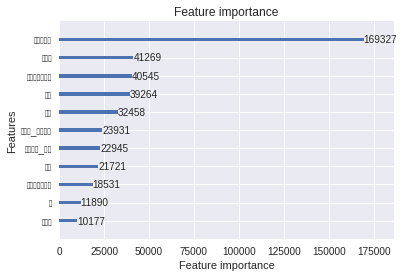

In [733]:
lightgbm.plot_importance(lgbm)

In [708]:
y_test

6575     1
6576     6
6577     5
6578     3
6579     9
        ..
6945    11
6946     1
6947     4
6948     5
6949     2
Name: 확진자수, Length: 375, dtype: int64

In [734]:
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,

In [735]:
x_test

,구,유동인구수,코로나,사회적거리두기,우울,소매점_여가시설,식료품점_약국,공원,대중교통정거장,직장,주거지
6575,중구,15.623914,2.371531,0.509711,0.022681,0.637681,0.397849,0.396552,0.814815,0.988235,0.10
6576,구로구,15.965918,2.371531,0.509711,0.022681,0.637681,0.397849,0.396552,0.814815,0.988235,0.10
6577,서대문구,15.612750,2.371531,0.509711,0.022681,0.637681,0.397849,0.396552,0.814815,0.988235,0.10
6578,성동구,15.661463,2.371531,0.509711,0.022681,0.637681,0.397849,0.396552,0.814815,0.988235,0.10
6579,송파구,16.331311,2.371531,0.509711,0.022681,0.637681,0.397849,0.396552,0.814815,0.988235,0.10
...,...,...,...,...,...,...,...,...,...,...,...
6945,서초구,16.145260,2.995233,0.703771,0.021155,0.434783,0.365591,0.241379,0.574074,0.905882,0.35
6946,동대문구,15.768018,2.995233,0.703771,0.021155,0.434783,0.365591,0.241379,0.574074,0.905882,0.35
6947,강북구,15.544210,2.995233,0.703771,0.021155,0.434783,0.365591,0.241379,0.574074,0.905882,0.35
6948,광진구,15.729454,2.995233,0.703771,0.021155,0.434783,0.365591,0.241379,0.574074,0.905882,0.35


In [710]:
x_train

,구,유동인구수,코로나,사회적거리두기,우울
0,중구,14.920559,3.989911,0.017201,0.015686
1,구로구,15.972887,3.989911,0.017201,0.015686
2,서대문구,15.629107,3.989911,0.017201,0.015686
3,성동구,15.569888,3.989911,0.017201,0.015686
4,송파구,16.328346,3.989911,0.017201,0.015686
...,...,...,...,...,...
6570,서초구,15.960447,2.072096,0.266180,0.020783
6571,동대문구,15.740460,2.072096,0.266180,0.020783
6572,강북구,15.581956,2.072096,0.266180,0.020783
6573,광진구,15.753282,2.072096,0.266180,0.020783


In [690]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
6195    5
6196    0
6197    0
6198    1
6199    0
Name: 확진자수, Length: 6100, dtype: int64